In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
scoring_metric = 'recall'
random_state = 42
comparison_dict, comparison_test_dict = {}, {}

In [3]:
data = pd.read_csv("dataset/Churn_Modelling.csv")
print(f" number of client: {data.shape[0]}, number of attribute: {data.shape[1]}")
print(f"data include the following rows:\n {data.columns.values}")
# data.isnull().sum()
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

 number of client: 10000, number of attribute: 14
data include the following rows:
 ['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


C:\Users\infam\AppData\Local\Temp\ipykernel_14912\1550840769.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["retained","churned"])


Text(0, 0.5, 'Count')

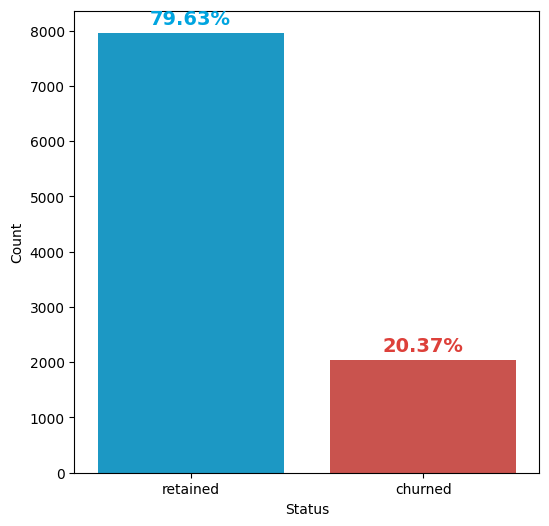

In [5]:

fig, ax = plt.subplots(figsize=(6,6))
colors = ['#00A5E0', '#DD403A']
sns.countplot(x="Exited", data=data, ax=ax, palette=colors)
for index, value in enumerate(data["Exited"].value_counts()):
    label = f'{round(100*value/len(data),2)}%'
    ax.annotate(label, xy=(index, value+250), ha="center", va="center", 
    fontsize=14, color=colors[index], fontweight="bold")

ax.set_xticklabels(["retained","churned"])
ax.set_xlabel("Status")
ax.set_ylabel("Count")

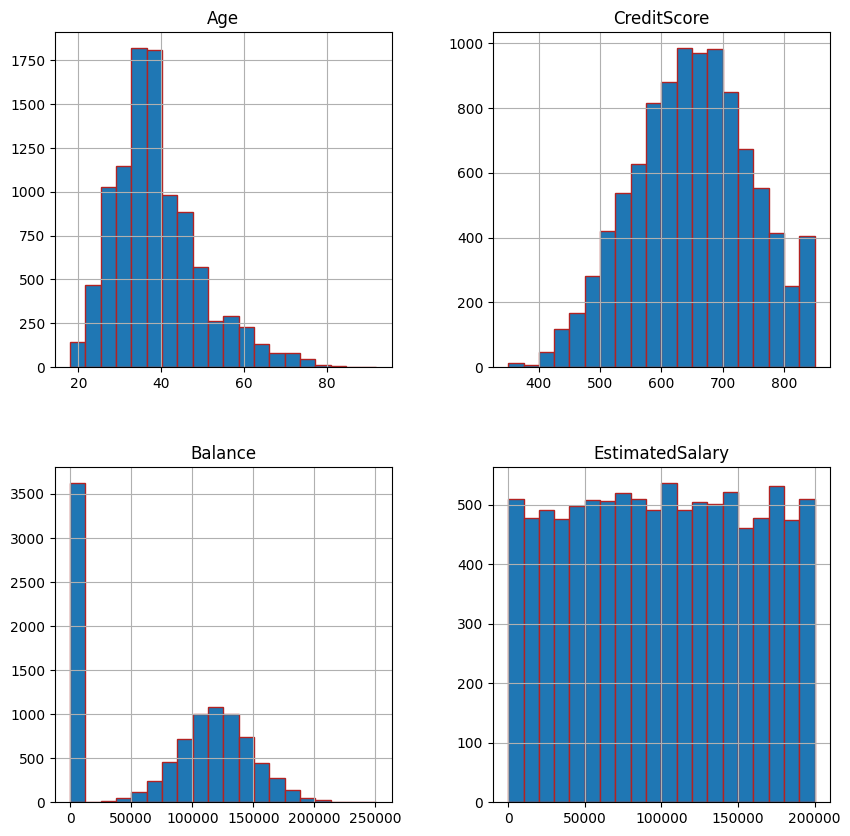

In [6]:
continuous = ["Age", "CreditScore", "Balance", "EstimatedSalary"]
data[continuous].hist(bins=20, figsize=(10,10), edgecolor='firebrick')
plt.show()

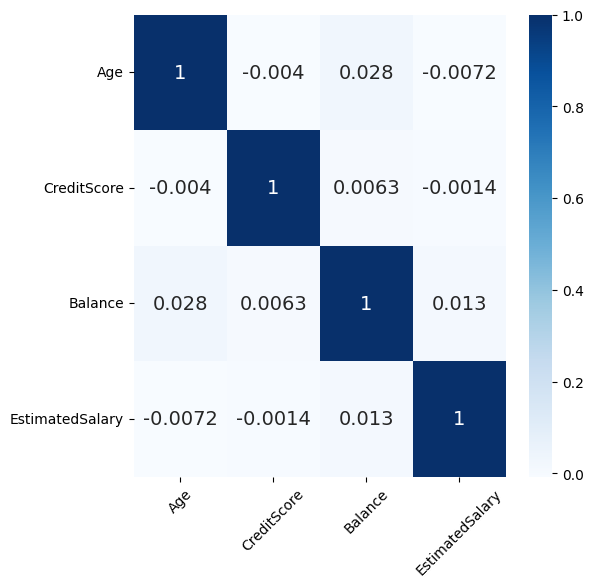

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(data[continuous].corr(), annot=True, annot_kws={'fontsize':14}, cmap='Blues', ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360)

In [8]:
def plt_hist_box(data, feature):
    df_func = data.copy()
    df_retained = df_func[df_func["Exited"]==0]
    df_churned = df_func[df_func["Exited"]==1]
    df_func["Exited"] = df_func['Exited'].astype('category')
    colors = ['#00A5E0', '#DD403A']
    fig, (ax1, ax2) = plt.subplots(2, figsize=(9,7),sharex=True)
    for df, color, label in zip([df_retained, df_churned], colors, ["retained", "churned"]):
        sns.histplot(data=df, x=feature, bins=15, alpha=0.6, edgecolor='firebrick', label=label, ax=ax1)
    ax1.legend(loc="best")
    sns.boxplot(x=feature, y="Exited", data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(["retained", "churned"])



C:\Users\infam\AppData\Local\Temp\ipykernel_7840\4076662643.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(["retained", "churned"])


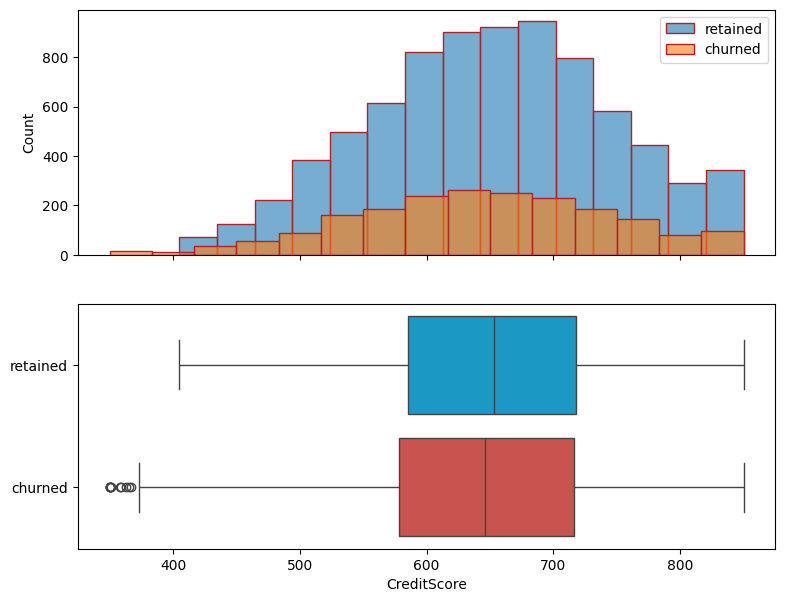

In [10]:
plt_hist_box(data, 'CreditScore')

C:\Users\infam\AppData\Local\Temp\ipykernel_7840\4076662643.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(["retained", "churned"])


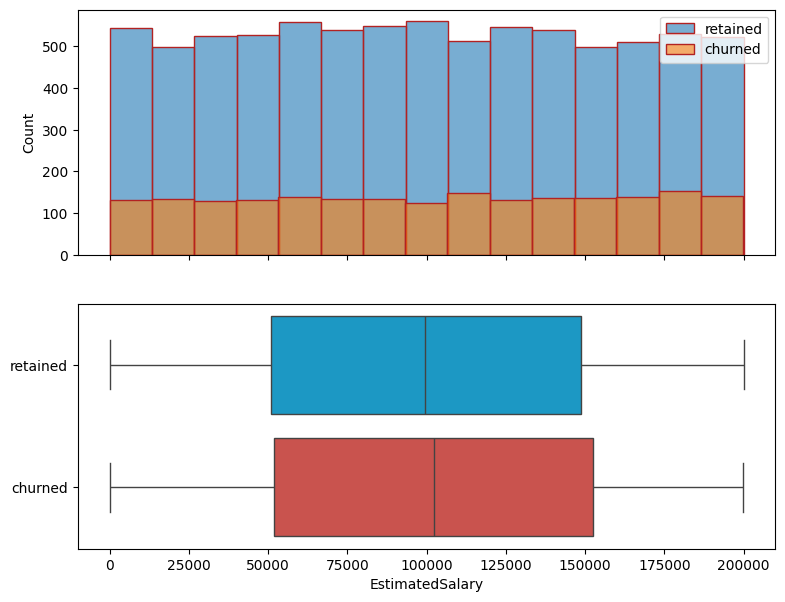

In [12]:
plt_hist_box(data,'EstimatedSalary' )

C:\Users\infam\AppData\Local\Temp\ipykernel_7840\4076662643.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(["retained", "churned"])


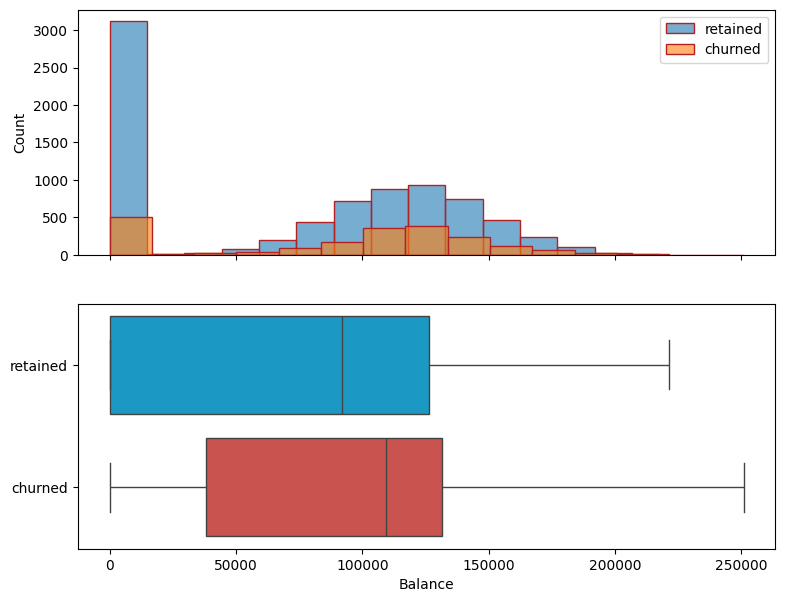

In [13]:
plt_hist_box(data, 'Balance')

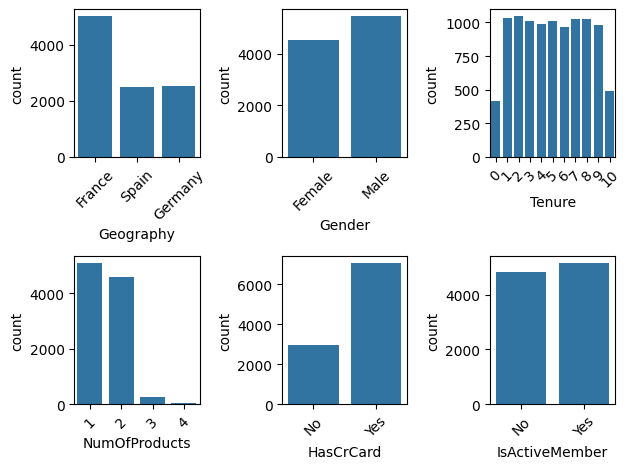

In [14]:
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
df_categorifcal = data[categorical]
for index, column in enumerate(df_categorifcal.columns):
    plt.subplot(2, 3, index+1)
    sns.countplot(x=column, data=data)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    if (column == 'HasCrCard' or column == 'IsActiveMember'):
        plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()



In [10]:
def plt_cat_count(data, feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    colors = ['#00A5E0', '#DD403A']
    sns.countplot(x=feature, hue="Exited", data=data, palette=colors, ax=ax1)
    ax1.set_ylabel("Count")
    ax1.legend(labels=["Retained", "Churned"])

    sns.barplot(x=feature, y="Exited", data=data, ax=ax2)
    ax2.set_ylabel("Churned rete")
    if (feature == 'HasCrCard' or feature == 'IsActiveMember'):
        ax1.set_xticklabels(['No', 'Yes'])
        ax2.set_xticklabels(['No', 'Yes'])
          
    plt.tight_layout()


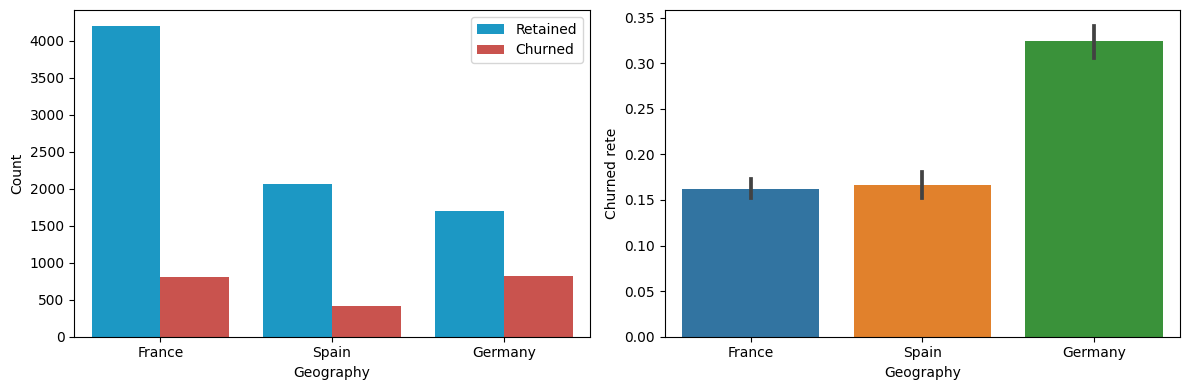

In [4]:
plt_cat_count(data, "Geography")

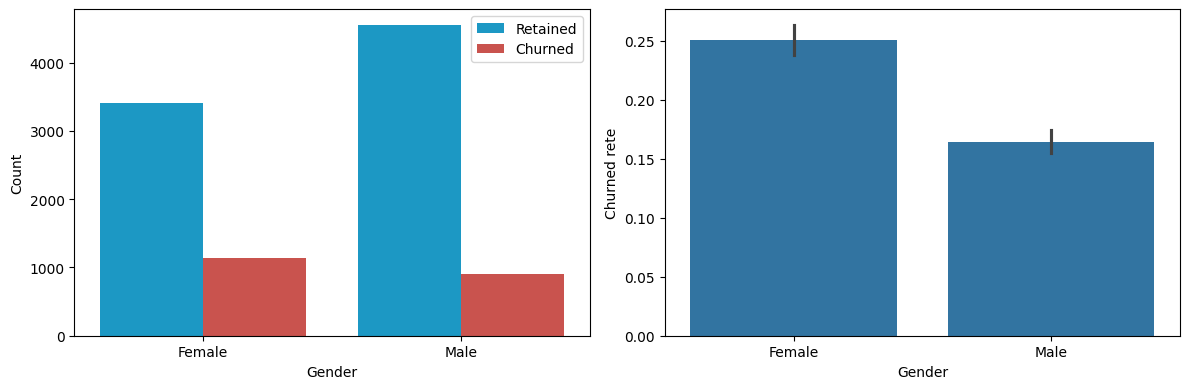

In [16]:
plt_cat_count(data, "Gender")

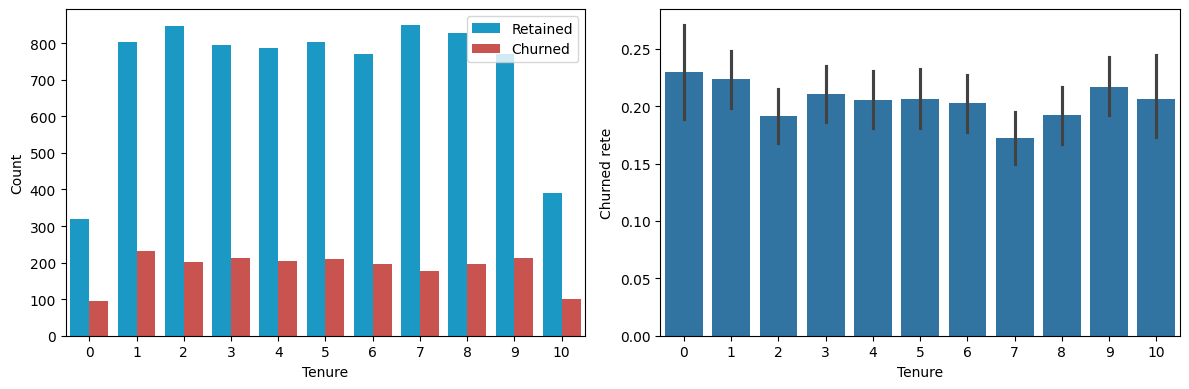

In [17]:
plt_cat_count(data, "Tenure")

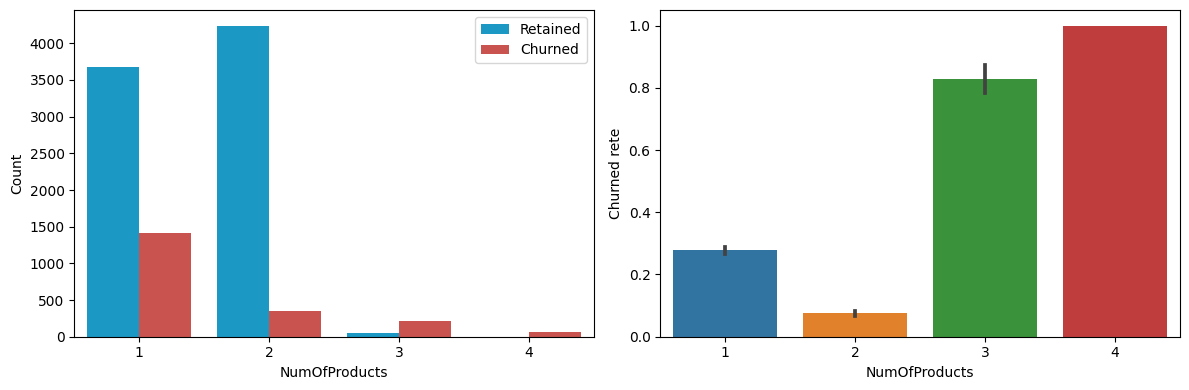

In [47]:
plt_cat_count(data, "NumOfProducts")

C:\Users\infam\AppData\Local\Temp\ipykernel_14912\793094288.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['No', 'Yes'])
C:\Users\infam\AppData\Local\Temp\ipykernel_14912\793094288.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['No', 'Yes'])


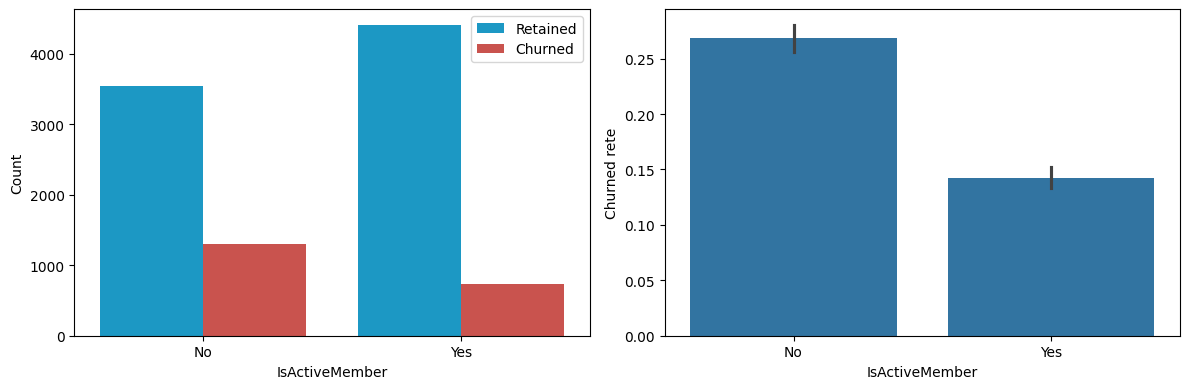

In [11]:
plt_cat_count(data, "IsActiveMember")